<h2 align="center">Table of Contents</h2> 

#### 1. Data collection - Import data
#### 2. Data Cleaning
#### 3. Data Aggregation
#### 4. Customer Retention & Churn rate
#### 5. RFM Customer Segmentation 

## 1. Data collection - Import data

In [3]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"D:\Dataa\Python\Jupyter notebook\Retail_sales\OnlineRetail.csv", encoding='windows-1254')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Change column invoicedate to datetime type
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data[data["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [10]:
# Add year month column
data["Year_month"] = data["InvoiceDate"].map(lambda x: x.year*100 +x.month)
data["Revenue"] = data["Quantity"]*data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_month,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


## 3. Data Aggregation

In [11]:
# Write SQL code to convert to aggregate data and import in python
agg_data = pd.read_csv(r"D:\Dataa\Python\Jupyter notebook\Retail_sales\agg_data.csv", encoding='windows-1254')
agg_data

,year_month,Quantity,Revenue,Customer_count,New_customer,Old_customer
0,201101,308966,5.600003e+05,783,421,362
1,201102,277989,4.980626e+05,798,380,418
2,201103,351872,6.832671e+05,1020,440,580
3,201104,289098,4.932071e+05,899,299,600
4,201105,380391,7.233335e+05,1079,279,800
5,201106,341623,6.911231e+05,1051,235,816
6,201107,391116,6.813001e+05,993,191,802
7,201108,406199,7.048046e+05,980,167,813
8,201109,549817,1.019688e+06,1302,298,1004
9,201110,570532,1.070705e+06,1425,352,1073


In [12]:
agg_data["Revenue"] = agg_data["Revenue"].round() 
agg_data

,year_month,Quantity,Revenue,Customer_count,New_customer,Old_customer
0,201101,308966,560000.0,783,421,362
1,201102,277989,498063.0,798,380,418
2,201103,351872,683267.0,1020,440,580
3,201104,289098,493207.0,899,299,600
4,201105,380391,723334.0,1079,279,800
5,201106,341623,691123.0,1051,235,816
6,201107,391116,681300.0,993,191,802
7,201108,406199,704805.0,980,167,813
8,201109,549817,1019688.0,1302,298,1004
9,201110,570532,1070705.0,1425,352,1073


In [14]:
agg_data["Revenue_Change"] = agg_data["Revenue"].pct_change()*100
agg_data["New_cus_ratio"] = agg_data["New_customer"] / agg_data["Customer_count"]
agg_data

,year_month,Quantity,Revenue,Customer_count,New_customer,Old_customer,Revenue_Change,New_cus_ration,New_cus_ratio
0,201101,308966,560000.0,783,421,362,NaN,0.537676,0.537676
1,201102,277989,498063.0,798,380,418,-11.060179,0.476190,0.476190
2,201103,351872,683267.0,1020,440,580,37.184854,0.431373,0.431373
3,201104,289098,493207.0,899,299,600,-27.816359,0.332592,0.332592
4,201105,380391,723334.0,1079,279,800,46.659313,0.258573,0.258573
5,201106,341623,691123.0,1051,235,816,-4.453130,0.223597,0.223597
6,201107,391116,681300.0,993,191,802,-1.421310,0.192346,0.192346
7,201108,406199,704805.0,980,167,813,3.450022,0.170408,0.170408
8,201109,549817,1019688.0,1302,298,1004,44.676613,0.228879,0.228879
9,201110,570532,1070705.0,1425,352,1073,5.003197,0.247018,0.247018


### Revenue and Growth rate by month

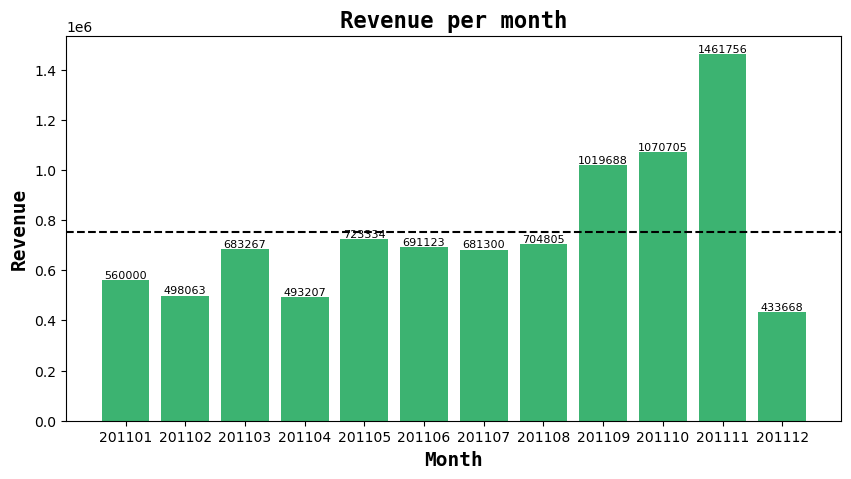

In [184]:
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar("year_month", height = "Revenue",data =agg_data, color = 'mediumseagreen', align = 'center',tick_label = "year_month" )
ax.set_title("Revenue per month", fontdict = font, size = 16)
ax.set_xlabel("Month",fontdict = font, size = 14 )
ax.set_ylabel("Revenue",fontdict = font, size = 14 )
plt.axhline(np.mean(agg_data["Revenue"]), color = 'black', linestyle ="--")
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "normal", fontsize = 8)

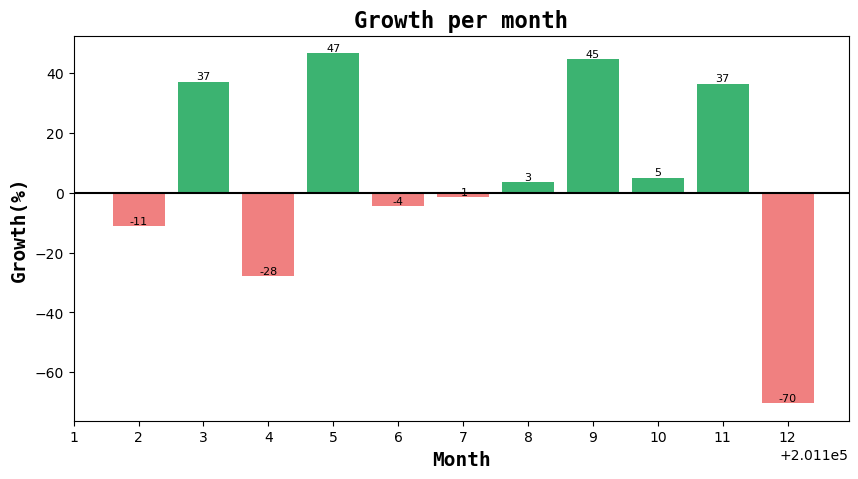

In [268]:
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

growthnev = agg_data[agg_data["Revenue_Change"]<0]
growthpos = agg_data[agg_data["Revenue_Change"]>=0]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar( growthpos["year_month"], growthpos["Revenue_Change"], color = 'mediumseagreen')
ax.bar( growthnev["year_month"],growthnev["Revenue_Change"], color = 'lightcoral' )
ax.set_xticks(agg_data["year_month"])
ax.set_title("Growth per month", fontdict = font, size = 16)
ax.set_xlabel("Month",fontdict = font, size = 14 )
ax.set_ylabel("Growth(%)",fontdict = font, size = 14 )
plt.axhline(0, color = 'black', linestyle ="-")
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "normal", fontsize = 8)

### Active Customer By Month - Old vs New

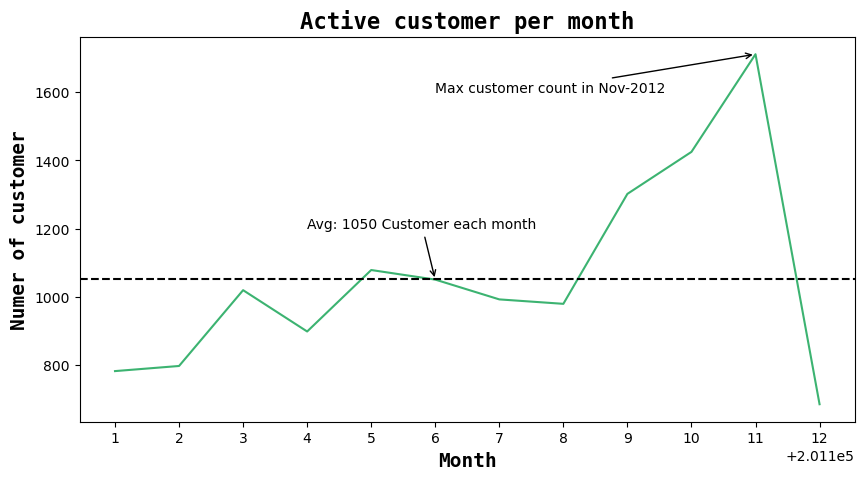

In [270]:
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot( "year_month", "Customer_count",data =agg_data, color = 'mediumseagreen')
ax.set_xticks(agg_data["year_month"])
ax.set_title("Active customer per month", fontdict = font, size = 16)
ax.set_xlabel("Month",fontdict = font, size = 14 )
ax.set_ylabel("Numer of customer",fontdict = font, size = 14 )
plt.axhline(np.mean(active_cus["Customer_count"]), color = 'black', linestyle ="--")
plt.annotate("Avg: 1050 Customer each month", xy = (201106,1050), xytext = (201104,1200),arrowprops = dict(arrowstyle= '->',color='black',lw=1,ls='-'))
plt.annotate("Max customer count in Nov-2012", xy = (201111,1711), xytext = (201106,1600),arrowprops = dict(arrowstyle= '->',color='black',lw=1,ls='-'))
plt.show()

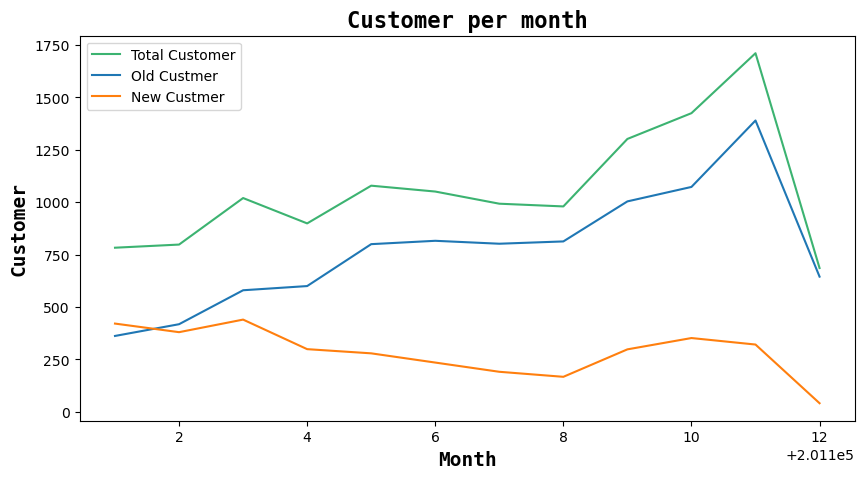

In [283]:
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot("year_month",  "Customer_count",data =agg_data, color = 'mediumseagreen', label = 'Total Customer')
ax.plot("year_month", "Old_customer",data =agg_data,  label = 'Old Custmer' )
ax.plot("year_month", "New_customer",data =agg_data,  label = 'New Custmer' )
ax.set_title("Customer per month", fontdict = font, size = 16)
ax.set_xlabel("Month",fontdict = font, size = 14 )
ax.set_ylabel("Customer",fontdict = font, size = 14 )
ax.legend(loc = "upper left")
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "normal", fontsize = 8)

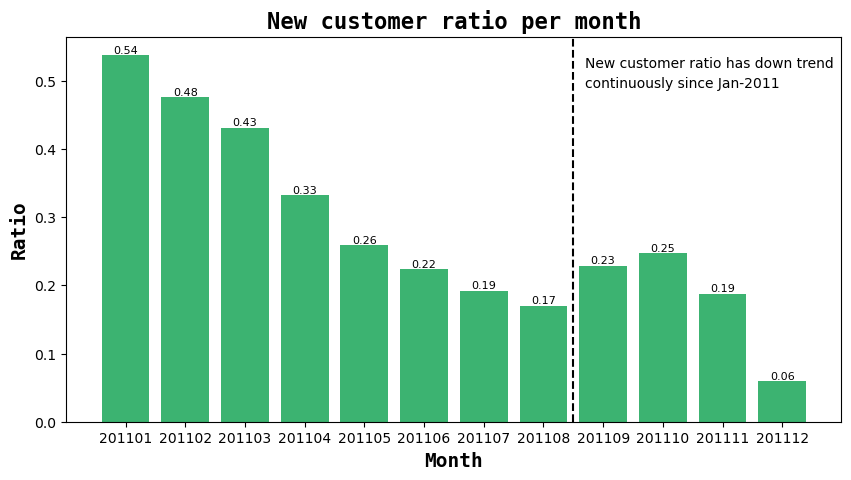

In [29]:
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar("year_month", height = "New_cus_ratio",data =agg_data, color = 'mediumseagreen', align = 'center',tick_label = "year_month" )
ax.set_title("New customer ratio per month", fontdict = font, size = 16)
ax.set_xlabel("Month",fontdict = font, size = 14 )
ax.set_ylabel("Ratio",fontdict = font, size = 14 )
plt.axvline(201108.5, color = 'black', linestyle ="--")
plt.annotate("New customer ratio has down trend", xy = (201108.7,0.52))
plt.annotate("continuously since Jan-2011", xy = (201108.7,0.49))

for rect in ax.patches:
    ax.annotate('{:.2f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "normal", fontsize = 8)

#### Insights
- It can be seen that our revenue and customer count grew steadily since **August-2011**
- The average number of active customers is about **1050** each month while the average revenue is about **730.000** 
- **November - 2011** was our best month with highest number of active customer - **1711** and a revenue of **1.461.756**
- Overall, our customer count trend went up but the number of new customer remain stable overtime
- New customer ratio also went up constinuously since **Jan-2011**

## 4. Monthly Retention - Churn Rate

In [15]:
agg_data.head()

,year_month,Quantity,Revenue,Customer_count,New_customer,Old_customer,Revenue_Change,New_cus_ration,New_cus_ratio
0,201101,308966,560000.0,783,421,362,NaN,0.537676,0.537676
1,201102,277989,498063.0,798,380,418,-11.060179,0.476190,0.476190
2,201103,351872,683267.0,1020,440,580,37.184854,0.431373,0.431373
3,201104,289098,493207.0,899,299,600,-27.816359,0.332592,0.332592
4,201105,380391,723334.0,1079,279,800,46.659313,0.258573,0.258573


In [30]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_month,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [32]:
cohort_data = data.groupby(['Year_month', 'CustomerID'])['InvoiceNo'].nunique().reset_index()
cohort_data['CohortMonth'] = cohort_data.groupby('CustomerID')['Year_month'].transform('min')
cohort_counts = cohort_data.groupby(['CohortMonth', 'Year_month'])['CustomerID'].nunique().reset_index()
cohort_data

,Year_month,CustomerID,InvoiceNo,CohortMonth
0,201012,12347.0,1,201012
1,201012,12348.0,1,201012
2,201012,12370.0,2,201012
3,201012,12377.0,1,201012
4,201012,12383.0,1,201012
...,...,...,...,...
13670,201112,18245.0,1,201012
13671,201112,18272.0,1,201104
13672,201112,18273.0,1,201103
13673,201112,18282.0,1,201108


In [40]:

cohort_counts['PeriodNumber'] = cohort_counts['Year_month'] - cohort_counts['CohortMonth']
cohort_pivot = cohort_counts.pivot_table(index='CohortMonth', columns='PeriodNumber', values='CustomerID')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix[1:12]

PeriodNumber,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
CohortMonth,,,,,,,,,,,,,,,,,,,,,
201101,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201102,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201103,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201104,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201105,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201109,1.0,0.298658,0.325503,0.120805,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


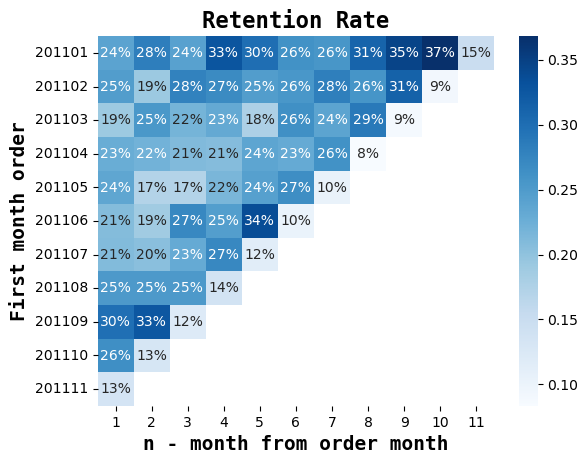

In [48]:
# Tạo heatmap từ bảng retention rate
sns.heatmap(retention_matrix.iloc[1:12,1:12], annot=True, fmt='.0%', cmap='Blues')

font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
plt.title('Retention Rate', fontdict = font , size = 16)
plt.xlabel('n - month from order month', fontdict = font , size = 14)
plt.ylabel('First month order', fontdict = font , size = 14)

# Hiển thị biểu đồ
plt.show()

In [46]:
churn_metric = 1-retention_matrix
churn_metric.iloc[1:12,1:12]

PeriodNumber,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,
201101,0.760095,0.717340,0.757720,0.672209,0.700713,0.738717,0.743468,0.688836,0.653207,0.631829,0.850356
201102,0.752632,0.807895,0.721053,0.731579,0.752632,0.744737,0.718421,0.742105,0.686842,0.907895,NaN
201103,0.809091,0.745455,0.781818,0.768182,0.822727,0.736364,0.761364,0.711364,0.911364,NaN,NaN
201104,0.772575,0.779264,0.789298,0.792642,0.762542,0.769231,0.739130,0.916388,NaN,NaN,NaN
201105,0.763441,0.827957,0.827957,0.784946,0.756272,0.734767,0.896057,NaN,NaN,NaN,NaN
201106,0.791489,0.812766,0.727660,0.753191,0.663830,0.897872,NaN,NaN,NaN,NaN,NaN
201107,0.790576,0.795812,0.769634,0.727749,0.884817,NaN,NaN,NaN,NaN,NaN,NaN
201108,0.748503,0.748503,0.748503,0.862275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201109,0.701342,0.674497,0.879195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


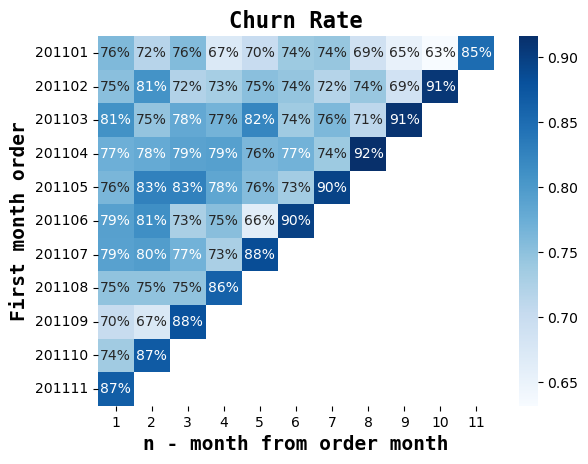

In [50]:
# Tạo heatmap từ bảng retention rate
sns.heatmap(churn_metric.iloc[1:12,1:12], annot=True, fmt='.0%', cmap='Blues')

font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
plt.title('Churn Rate', fontdict = font , size = 16)
plt.xlabel('n - month from order month', fontdict = font , size = 14)
plt.ylabel('First month order', fontdict = font , size = 14)

# Hiển thị biểu đồ
plt.show()

In [67]:
cohort_diff = retention_matrix.diff(axis=1)

# Định dạng lại bảng cohort retention
cohort_diff.iloc[:,1] = 0

# Hiển thị bảng cohort retention
cohort_diff.iloc[1:12,:12]

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,,
201101,NaN,0,0.042755,-0.040380,0.085511,-0.028504,-0.038005,-0.004751,0.054632,0.035629,0.021378,-0.218527
201102,NaN,0,-0.055263,0.086842,-0.010526,-0.021053,0.007895,0.026316,-0.023684,0.055263,-0.221053,NaN
201103,NaN,0,0.063636,-0.036364,0.013636,-0.054545,0.086364,-0.025000,0.050000,-0.200000,NaN,NaN
201104,NaN,0,-0.006689,-0.010033,-0.003344,0.030100,-0.006689,0.030100,-0.177258,NaN,NaN,NaN
201105,NaN,0,-0.064516,0.000000,0.043011,0.028674,0.021505,-0.161290,NaN,NaN,NaN,NaN
201106,NaN,0,-0.021277,0.085106,-0.025532,0.089362,-0.234043,NaN,NaN,NaN,NaN,NaN
201107,NaN,0,-0.005236,0.026178,0.041885,-0.157068,NaN,NaN,NaN,NaN,NaN,NaN
201108,NaN,0,0.000000,0.000000,-0.113772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201109,NaN,0,0.026846,-0.204698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


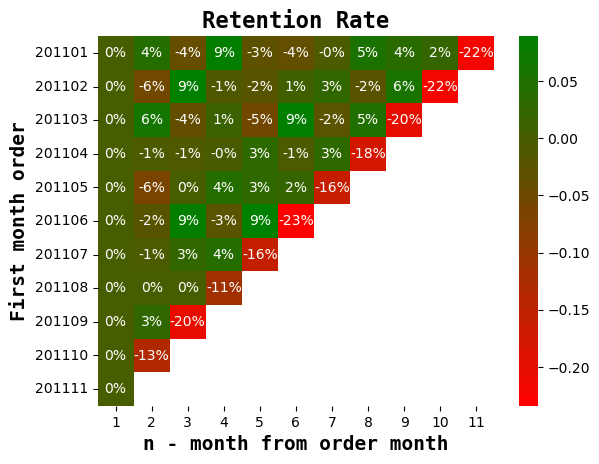

In [80]:
# Tạo heatmap từ bảng retention rate
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('custom', ['red','green'], N=256)

sns.heatmap(cohort_diff.iloc[1:12,1:12], annot=True, fmt='.0%', cmap=cmap)

font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
plt.title('Retention Rate', fontdict = font , size = 16)
plt.xlabel('n - month from order month', fontdict = font , size = 14)
plt.ylabel('First month order', fontdict = font , size = 14)

# Hiển thị biểu đồ
plt.show()

#### Insights

- Look like that our retention rate is quite low, only about 25% after 4 to 5 month. Consider the average retention rate of 65% yearly of retail business
- We should consider some strategies for improving retention rate such as: create loyalty program, implement personalization, create a community,..

### 5. Customer Segmentation Using RFM


In [121]:
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

data_rfm = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'
})

data_rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Revenue': 'MonetaryValue'}, inplace=True)

data_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [77]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_month,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [123]:
# Create the quartiles for each RFM value
r_quartiles = pd.qcut(data_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
f_quartiles = pd.qcut(data_rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
m_quartiles = pd.qcut(data_rfm['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5])

# Assign the quartile values to the data_rfm DataFrame
data_rfm = data_rfm.assign(R=r_quartiles.values,
                           F=f_quartiles.values,
                           M=m_quartiles.values)

# Create a combined RFM score
data_rfm['RFM_Segment'] = data_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)
data_rfm['RFM_Score'] = data_rfm[['R', 'F', 'M']].sum(axis=1)
data_rfm.reset_index()
data_rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,13,176.60,5,1,1,511,7


In [111]:
# Import RFM map score to identify segment of customer
RFM_map = pd.read_csv("D:\Dataa\SQL\RFM_Analyst\RFM_analysis\segment_scores.csv")
RFM_map['Scores'] = RFM_map['Scores'].astype(str)
RFM_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Segment  128 non-null    object
 1   Scores   128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [124]:
data_rfm = pd.merge( data_rfm, RFM_map, left_on = "RFM_Segment", right_on = "Scores" )
data_rfm = data_rfm.drop(columns = "Scores")
data_rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
0,326,2,0.00,1,1,1,111,3,Lost customers
1,204,4,89.00,1,1,1,111,3,Lost customers
2,287,10,189.90,1,1,1,111,3,Lost customers
3,303,5,84.30,1,1,1,111,3,Lost customers
4,323,11,225.60,1,1,1,111,3,Lost customers
...,...,...,...,...,...,...,...,...,...
4388,21,66,197.63,4,4,1,441,9,Potential Loyalist
4389,12,64,190.19,4,4,1,441,9,Potential Loyalist
4390,16,27,4892.24,4,2,5,425,11,Promising
4391,18,28,2288.13,4,2,5,425,11,Promising


In [188]:
segment = data_rfm.groupby("Segment").count()["Recency"].reset_index()
segment.rename(columns={'Recency': 'Customer_count'}, inplace=True)
segment = segment.sort_values(by = "Customer_count", ascending = True).reset_index(drop = True)
segment

,Segment,Customer_count
0,Cannot Lose Them,83
1,Promising,138
2,About To Sleep,179
3,Need Attention,243
4,New Customers,307
5,Loyal,405
6,At Risk,429
7,Lost customers,445
8,Potential Loyalist,501
9,Champions,828


In [151]:
segment.iterrows()

<generator object DataFrame.iterrows at 0x000001809BE75660>

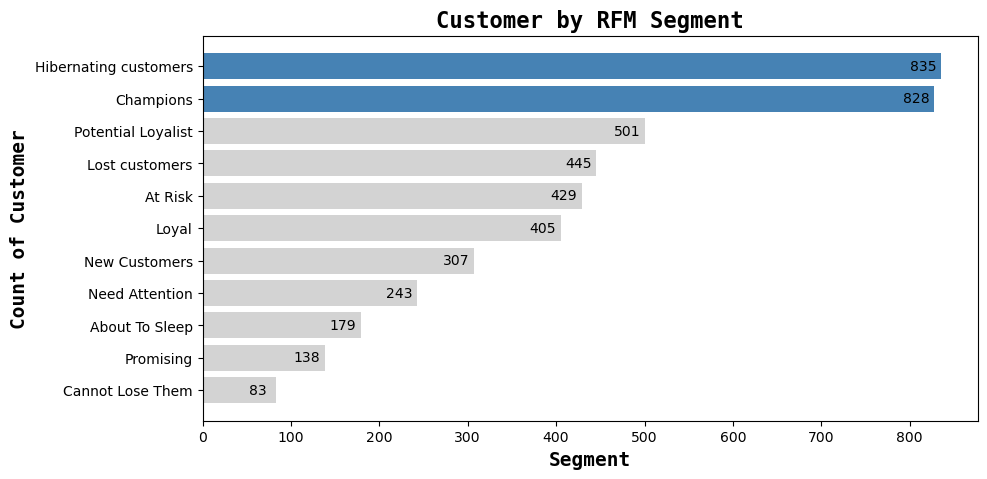

In [173]:
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
colors = ['lightgrey'] * (len(segment) - 2) + ['steelblue', 'steelblue']

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh("Segment", width = "Customer_count",data = segment, color = colors, align = 'center' )
ax.set_yticks(segment["Segment"], fontsize = 5)
ax.set_yticklabels(segment["Segment"], rotation=0) # Rotate the xtick labels
ax.set_title("Customer by RFM Segment", fontdict = font, size = 16)
ax.set_xlabel("Segment",fontdict = font, size = 14 )
ax.set_ylabel("Count of Customer",fontdict = font, size = 14 )
for i, row in segment.iterrows():
    ax.text(row['Customer_count']-20 , i, row['Customer_count'], ha='center', va='center')

#### Insights

- The **largest segment** is **Hiberating customers**, these are customers who haven’t purchased in a while and *may need to be re-engaged with targeted marketing efforts*

- It appears that the second largest segment of your customers are **“Champions”** with 828 customers. These are our best customers who have recently purchased, purchase frequently, and spend the most. It’s important to *keep these customers engaged and satisfied.*

- Look like that we have many **loyal customer** - 405 of loyal segment and 501 of potential loyalist, these are customer with high frequency. *We should consider recommend other product to them or ask them for a review.*

- **At risk segment** is also high - about 429 customers, we should take some effort to bring them back *(send personalised email or other messages to reconnect. Provide good offers and share valuable resources)*


***
- Edit by: Tri Hai
- Date: 24/04/2023
- Dataset link: https://drive.google.com/file/d/150ngSGpfHZsPgC2LpJPwYfLgJoCIODa0/view
- Reference: **Rinez** - youtube: https://www.youtube.com/@rinpython